# Set Up

In [4]:
#Import dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import hvplot.pandas
from scipy.stats import linregress

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Import data
path = os.path.join("Resources", "NA_sample_020.csv")
df = pd.read_csv(path)
df.head()

,Unnamed: 0,created_at,lat,lng,sentiment,topic,stance,gender,aggressiveness
0,8037902,2018-01-31 20:40:44+00:00,40.441694,-79.990086,-0.120697,Politics,believer,male,aggressive
1,8790126,2018-03-15 21:28:05+00:00,38.895110,-77.036370,-0.378573,Global stance,believer,male,not aggressive
2,11647260,2018-09-29 14:42:56+00:00,44.000340,-72.749830,-0.216689,Politics,believer,female,not aggressive
3,11810796,2018-10-08 22:23:50+00:00,39.952330,-75.163790,-0.687731,Global stance,believer,female,not aggressive
4,13183104,2018-12-16 11:52:40+00:00,45.421106,-75.690308,0.611834,Weather Extremes,believer,male,not aggressive


## Create column with month and year

In [6]:
# Create new df with column with month and date
dates = pd.to_datetime(df["created_at"], infer_datetime_format=True)
df_month = df.loc[:, ["created_at", "lat", "lng", "sentiment", "topic", "stance", "gender", "aggressiveness"]]
df_month["created_at"] = dates
df_month['date'] = df_month['created_at'].dt.to_period('M')
df_month.head()

,created_at,lat,lng,sentiment,topic,stance,gender,aggressiveness,date
0,2018-01-31 20:40:44+00:00,40.441694,-79.990086,-0.120697,Politics,believer,male,aggressive,2018-01
1,2018-03-15 21:28:05+00:00,38.895110,-77.036370,-0.378573,Global stance,believer,male,not aggressive,2018-03
2,2018-09-29 14:42:56+00:00,44.000340,-72.749830,-0.216689,Politics,believer,female,not aggressive,2018-09
3,2018-10-08 22:23:50+00:00,39.952330,-75.163790,-0.687731,Global stance,believer,female,not aggressive,2018-10
4,2018-12-16 11:52:40+00:00,45.421106,-75.690308,0.611834,Weather Extremes,believer,male,not aggressive,2018-12


# HV plot with location of aggressive tweets for each year

In [7]:
df_month["created_at"] = dates
df_month['year'] = df_month['created_at'].dt.year

df_aggression_2016 = df_month.loc[(df_month["year"]==2016), ["lat", "lng", "sentiment", "stance", "aggressiveness"]]

In [8]:
# Configure the map


fig_aggression_jenn = df_aggression_2016.hvplot.points(
    "lng",
    "lat",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    #size = "sentiment",
    color = "stance",
    alpha = 0.5, 
    title = "Aggression by year in US"   
)

# Display the map plot
fig_aggression_jenn


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lng,lat]   (stance)

# Topics over Time

In [9]:
# Topics over time
df_topics = df_month.groupby(["date", "topic"])["created_at"].count()
df_topics

date     topic                           
2007-01  Weather Extremes                      2
2007-02  Global stance                         2
         Seriousness of Gas Emissions          1
         Weather Extremes                      1
2007-03  Global stance                         1
                                            ... 
2019-09  Undefined / One Word Hashtags        14
         Weather Extremes                    137
2019-10  Global stance                         8
         Importance of Human Intervantion      1
         Politics                              1
Name: created_at, Length: 1461, dtype: int64

# Looking at stance, agression, and sentiment over time

### Add columns to df to make it easy to see how factors change over time

In [10]:
# Create new column for agressiveness factor
df_month["aggressiveness_factor"] = " "
df_month["stance_factor"] = " "

#Loop through df and change the ag factor to 0 1 depending on the agressiveness
for index, row in df_month.iterrows():
    if row["aggressiveness"] == "aggressive":
        df_month.loc[index, "aggressiveness_factor"] = 1.0
    else:
        df_month.loc[index, "aggressiveness_factor"] = 0.0 

    if row["stance"] == "believer":
        df_month.loc[index, "stance_factor"] = 1.0
    else:
        df_month.loc[index, "stance_factor"] = 0.0

df_month.head()

# Go back to see what "neutral" means for stance

,created_at,lat,lng,sentiment,topic,stance,gender,aggressiveness,date,year,aggressiveness_factor,stance_factor
0,2018-01-31 20:40:44+00:00,40.441694,-79.990086,-0.120697,Politics,believer,male,aggressive,2018-01,2018,1.0,1.0
1,2018-03-15 21:28:05+00:00,38.895110,-77.036370,-0.378573,Global stance,believer,male,not aggressive,2018-03,2018,0.0,1.0
2,2018-09-29 14:42:56+00:00,44.000340,-72.749830,-0.216689,Politics,believer,female,not aggressive,2018-09,2018,0.0,1.0
3,2018-10-08 22:23:50+00:00,39.952330,-75.163790,-0.687731,Global stance,believer,female,not aggressive,2018-10,2018,0.0,1.0
4,2018-12-16 11:52:40+00:00,45.421106,-75.690308,0.611834,Weather Extremes,believer,male,not aggressive,2018-12,2018,0.0,1.0


In [11]:
# Change the type for the factors to be floats
df_month = df_month.astype({
    "aggressiveness_factor": "float64",
    "stance_factor": "float64"
})


<Figure size 720x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

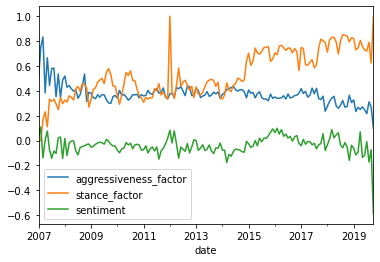

<Figure size 720x720 with 0 Axes>

In [12]:
# Average Sentiment over Time

df_averages = df_month.groupby("date")[["aggressiveness_factor", "stance_factor", "sentiment"]].mean() 
# The aggressiveness and stance factors give the percentages of people who are aggressive or believe in climate change

plt.figure(); df_averages.plot(); plt.legend(loc='best'); plt.figure(figsize = (10,10))#; plt.vlines(2012,0,1,alpha=0.25)

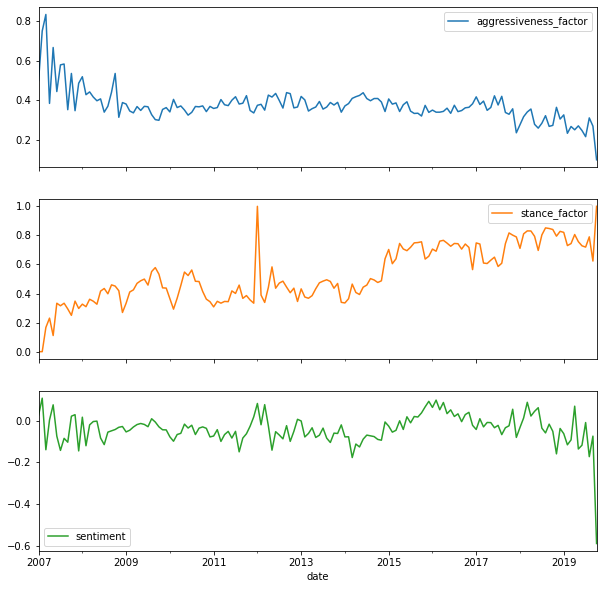

In [13]:
df_averages.plot(subplots=True, figsize=(10, 10)); plt.legend(loc='best')

# Taking a Closer Look at Stance over Time

<AxesSubplot:xlabel='date', ylabel='stance_factor'>

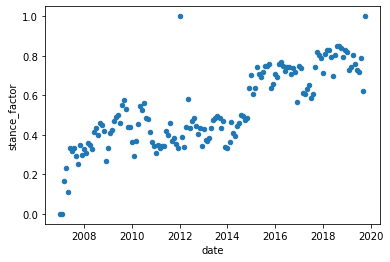

In [14]:
series_stance = df_averages["stance_factor"]
df_stance = series_stance.to_frame()
df_stance.reset_index(inplace=True)
df_stance["date"] = df_stance["date"].astype("datetime64")
df_stance.plot.scatter(x = "date", y = "stance_factor")

The r value: 0.8309364069571434


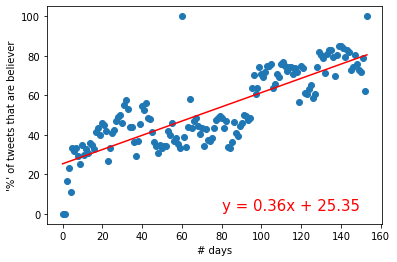

In [39]:
x_values = [x for x in range(len(df_stance))] #list(df_stance["date"])
y = list(df_stance["stance_factor"])
y_values = [100*y for y in y]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = [float(x) * slope + intercept for x in x_values]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))       #Getting ready to write the equation on the graph
plt.scatter(x_values,y_values)          #Create scatter plot 
plt.plot(x_values,regress_values,"r-")      # Plotting red line
plt.annotate(line_eq,(80, 2),fontsize=15,color="red") # Graphing the equation on the plot 
plt.xlabel('# days')
plt.ylabel("'%' of tweets that are believer")
print(f"The r value: {rvalue}")
plt.show()

# Look at data starting from 2016 to get a closer look at recent trends

In [74]:
# Create new dataframe where the index is reset and the "date" coloumn is converted to datetime64
df_time = df_month.copy()
df_time.reset_index(inplace=True)
df_time["date"] = df_time["date"].astype("datetime64")

# Make a new dataframe looking at just after 2016 and cutting off the outlier of October 2019
df_2016 = df_time.loc[(df_time["date"] >= (pd.to_datetime("2016-01-01"))) & (df_time["date"] <= (pd.to_datetime("2019-09-01"))), :]

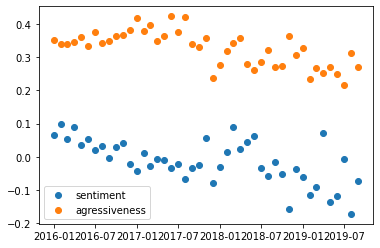

In [80]:
# Create DF grouped by the date and the mean is taken
df_2016_avg = df_2016.groupby("date")[["aggressiveness_factor", "stance_factor", "sentiment"]].mean()   

df_2016_avg.reset_index(inplace=True)

fig2016, ax = plt.subplots()
ax.scatter(df_2016_avg["date"], df_2016_avg["sentiment"], label="sentiment")
ax.scatter(df_2016_avg["date"], df_2016_avg["aggressiveness_factor"], label="agressiveness")
ax.legend()

plt.show()

# Sandbox